Prior to all, install tensoptly with pip ("pip install ." in the tensorly folder that includes tensoptly in contrib)
Run this outside tensorly ? (help!!)

In [3]:
import matplotlib.pyplot as plt
import tensorly as tl
import numpy as np
from scipy.misc import face, imresize

In [5]:
from tensorly.contrib.tensoptly import Parafac

ModuleNotFoundError: No module named 'tensorly.contrib.tensoptly'

In [4]:
random_state = 12345

image = tl.tensor(imresize(face(), 0.3), dtype='float64')

def to_image(tensor):
    """A convenience function to convert from a float dtype back to uint8"""
    im = tl.to_numpy(tensor)
    im -= im.min()
    im /= im.max()
    im *= 255
    return im.astype(np.uint8)

# Rank of the CP decomposition
cp_rank = 25



/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  This is separate from the ipykernel package so we can avoid doing imports until


# Testing the ALS algorithm and the class definition

In [5]:
# Perform the CP decomposition
    # Fixed mode test
fixed = []
    # Constraints test
constraints = []    
    # creating the class instance
model = tpl.Parafac(rank=cp_rank, verbose=True, init='random',
                          random_state=random_state, fixed_modes = fixed,
                          n_iter_max=10, constraints = constraints)

In [6]:
factors, errors = model.fit(image)
errors[-1]

Using ALS to compute Parafac
reconstruction error=0.13216372257264367, variation=0.0069395630310157.
reconstruction error=0.12940037984865801, variation=0.002763342723985651.
reconstruction error=0.12778889084123585, variation=0.0016114890074221677.
reconstruction error=0.12673971815784246, variation=0.0010491726833933845.
reconstruction error=0.12600321805776518, variation=0.0007365001000772808.
reconstruction error=0.12544695713137666, variation=0.0005562609263885243.
reconstruction error=0.12500348149714732, variation=0.00044347563422933445.
reconstruction error=0.1246373390894801, variation=0.0003661424076672193.


0.1246373390894801

In [7]:
# Reconstruct the image from the factors
cp_reconstruction = model.reconstruct()

In [8]:
# Normalizing the results
model.normalize()

# Testing Fast Gradient or HALS

In [12]:
# Perform the CP decomposition
    # Choosing the Fast Gradient optimization method
#algo = 'FG'    
algo = 'HALS'
    # Choosing stepsize (FG)
step = 5*1e-7
    # Choosing acceleration (HALS)
alpha = 0.5
delta = 1e-2
    # Fixed mode test
fixed = [];
    # Constraints test
constraints = ['NN','NN','NN']    
    # creating the class instance
model2 = tpl.Parafac(rank=cp_rank, verbose=True, init='random',
                     random_state=random_state, fixed_modes=fixed,
                     n_iter_max=10, constraints=constraints,
                     method=algo, step=step, tol=1e-5, alpha_hals=alpha,
                     delta_hals=delta)
    # Improve init
model2.init_factors = tl.abs(model2.init_factors)

In [13]:
factor_fg, errors_fg = model2.fit(image)
errors_fg[-1]

reconstruction error=0.15798399020903817, variation=0.014125957457108818.
reconstruction error=0.15146503201916323, variation=0.0065189581898749405.
reconstruction error=0.14838325948757675, variation=0.0030817725315864797.
reconstruction error=0.14640760634425729, variation=0.0019756531433194613.
reconstruction error=0.1448351659940389, variation=0.0015724403502183903.
reconstruction error=0.14366115589193612, variation=0.0011740101021027738.
reconstruction error=0.1427179529395083, variation=0.0009432029524278074.
reconstruction error=0.14193555142935718, variation=0.0007824015101511317.
reconstruction error=0.14126155458154135, variation=0.0006739968478158276.
reconstruction error=0.14067836999488076, variation=0.0005831845866605956.
reconstruction error=0.1401655242174457, variation=0.0005128457774350725.
reconstruction error=0.13971042824529187, variation=0.00045509597215381836.
reconstruction error=0.1393264141076358, variation=0.00038401413765606907.
reconstruction error=0.13899

0.13376499417582333

In [11]:
# Reconstruct the image from the factors
cp_reconstruction2 = model2.reconstruct()

# Testing Multiplicative Update

In [12]:
# Perform the CP decomposition with MU
    # Fixed mode test
fixed = []
    # Constraints test
constraints = ['NN','NN','NN']    
    # creating the class instance
model3 = tpl.Parafac(rank=cp_rank, verbose=True, init='random',
                           random_state=random_state, fixed_modes = fixed,
                           n_iter_max=100, constraints = constraints,
                           tol=1e-8)

 using default projected fast gradient instead.


In [13]:
# Different syntax, e.g. user wants to correct method after warning
model3.method = 'MU'

In [14]:
factor_mu, errors_mu = model3.fit(image)
errors_mu[-1]

reconstruction error=0.36793113734206423, variation=0.0062205568295279345.
reconstruction error=0.36218689056503817, variation=0.005744246777026063.
reconstruction error=0.3568988361051827, variation=0.0052880544598554735.
reconstruction error=0.35204895842566486, variation=0.004849877679517833.
reconstruction error=0.3475450608702947, variation=0.004503897555370173.
reconstruction error=0.34322801842207695, variation=0.004317042448217734.
reconstruction error=0.3389172394228217, variation=0.004310778999255249.
reconstruction error=0.3344550625274336, variation=0.004462176895388081.
reconstruction error=0.32973356140036547, variation=0.004721501127068151.
reconstruction error=0.324704563566627, variation=0.005028997833738447.
reconstruction error=0.31937793776568224, variation=0.005326625800944784.
reconstruction error=0.31381153523718053, variation=0.005566402528501713.
reconstruction error=0.308095358586494, variation=0.005716176650686522.
reconstruction error=0.3023335184958582, var

0.16393514612232746

In [15]:
# Reconstruct the image from the factors
cp_reconstruction3 = model3.reconstruct()

# Comparative plots

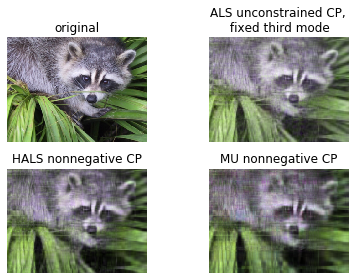

In [16]:
# Plotting the original and reconstruction from the decompositions
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
ax.set_axis_off()
ax.imshow(to_image(image))
ax.set_title('original')

ax = fig.add_subplot(2, 2, 2)
ax.set_axis_off()
ax.imshow(to_image(cp_reconstruction))
ax.set_title('ALS unconstrained CP,\n fixed third mode')

ax = fig.add_subplot(2, 2, 3)
ax.set_axis_off()
ax.imshow(to_image(cp_reconstruction2))
ax.set_title('HALS nonnegative CP')

ax = fig.add_subplot(2, 2, 4)
ax.set_axis_off()
ax.imshow(to_image(cp_reconstruction3))
ax.set_title('MU nonnegative CP')

plt.tight_layout()
plt.show()